# Test Notebook to visualize the data and start playing around

## Libraries

In [142]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
from matplotlib import pyplot as plt
import random
random.seed(1)

## Import of Picture data

In [60]:
df = pd.read_csv(r'data\hmnist_28_28_L.csv')
print(df)

       pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0            169        171        170        177        181        182   
1             19         57        105        140        149        148   
2            155        163        161        167        167        172   
3             25         71        116        139        136        153   
4            129        162        181        196        205        208   
...          ...        ...        ...        ...        ...        ...   
10010        172        171        173        175        164        187   
10011          2         34        108        116        114        119   
10012        122        154        162        170        179        197   
10013        137        143        141        139        147        152   
10014        149        157        157        152        151        152   

       pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel0775  pixel0776  \
0            181   

## Display of images

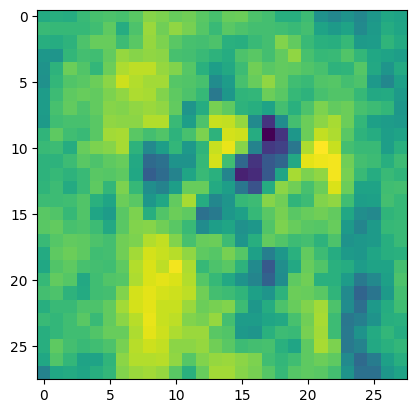

In [61]:
img_number = 0
data_vec = df.loc[img_number]
img_label = data_vec[-1]
img_vec = data_vec[0:-1]

size = np.size(img_vec)
dimension = int(math.sqrt(size))

img_mat = np.reshape(np.array(img_vec), (dimension, dimension))

plt.imshow(img_mat)
plt.show()


# Extraction and grouping of labels 

In [62]:
label = df['label']
uniq_label, counts_label = np.unique(label, return_counts=True)
print(list(zip(uniq_label, counts_label)))

[(0, 327), (1, 514), (2, 1099), (3, 115), (4, 6705), (5, 142), (6, 1113)]


# Import of Metadata

In [63]:
df_meta = pd.read_csv(r'data\HAM10000_metadata.csv')
print(df_meta)

         lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]


# Extraction of different diagnostic cathegories

Labels / Cathegories:

0 / Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec)

1 / basal cell carcinoma (bcc)

2 / benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl)

3 / dermatofibroma (df)

4 / melanoma (mel)

5 / melanocytic nevi (nv)

6 / vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc)

In [64]:
cath = df_meta['dx']
uniq_cath, counts_cath = np.unique(cath, return_counts=True)
print(list(zip(uniq_cath, counts_cath)))

[('akiec', 327), ('bcc', 514), ('bkl', 1099), ('df', 115), ('mel', 1113), ('nv', 6705), ('vasc', 142)]


# Grouping the pictures by the different diagnosis

In [143]:
img_index_group = []                #List with 6 nested lists; index of nested list = label / cathegorie; values in nested lists = index of pictures belonging to that label /cathegorie
for i in range(len(uniq_label)):
    img_index_group.append([])
    for j in range(df.shape[0]):
        if df['label'][j] == i:
            img_index_group[i].append(j)

print(list((i, len(img_index_group[i])) for i in range(len(img_index_group))))
print(img_index_group)

[(0, 327), (1, 514), (2, 1099), (3, 115), (4, 6705), (5, 142), (6, 1113)]
[[9687, 9688, 9689, 9690, 9691, 9692, 9693, 9694, 9695, 9696, 9697, 9698, 9699, 9700, 9701, 9702, 9703, 9704, 9705, 9706, 9707, 9708, 9709, 9710, 9711, 9712, 9713, 9714, 9715, 9716, 9717, 9718, 9719, 9720, 9721, 9722, 9723, 9724, 9725, 9726, 9727, 9728, 9729, 9730, 9731, 9732, 9733, 9734, 9735, 9736, 9737, 9738, 9739, 9740, 9741, 9742, 9743, 9744, 9745, 9746, 9747, 9748, 9749, 9750, 9751, 9752, 9753, 9754, 9755, 9756, 9757, 9758, 9759, 9760, 9761, 9762, 9763, 9764, 9765, 9766, 9767, 9768, 9769, 9770, 9771, 9772, 9773, 9774, 9775, 9776, 9777, 9778, 9779, 9780, 9781, 9782, 9783, 9784, 9785, 9786, 9787, 9788, 9789, 9790, 9791, 9792, 9793, 9794, 9795, 9796, 9797, 9798, 9799, 9800, 9801, 9802, 9803, 9804, 9805, 9806, 9807, 9808, 9809, 9810, 9811, 9812, 9813, 9814, 9815, 9816, 9817, 9818, 9819, 9820, 9821, 9822, 9823, 9824, 9825, 9826, 9827, 9828, 9829, 9830, 9831, 9832, 9833, 9834, 9835, 9836, 9837, 9838, 9839, 9840, 

# Splitting into training and testing data

In [145]:
training_split = 0.9                #Percentage of Data used for training
img_index_group_split = []          #Same as img_index_group but every nested list is split into two lists: first is list for training, second is list for testing

for i in range(len(img_index_group)):
    random.shuffle(img_index_group[i])
    split_point = round(len(img_index_group[i])*training_split)
    img_index_group_split.append([img_index_group[i][:split_point], img_index_group[i][split_point:]])
    
    #print(i)
    #print(len(img_index_group_split[i][0]))
    #print(len(img_index_group_split[i][1]))

print(img_index_group_split)

[[[9712, 10005, 9881, 9816, 9997, 9736, 9775, 9840, 9773, 9811, 9766, 9963, 9810, 9796, 9861, 9864, 9807, 9904, 9951, 9741, 9834, 9962, 9991, 9831, 9907, 9923, 9945, 9738, 10008, 9965, 9696, 9802, 10001, 9947, 9852, 9887, 9832, 9916, 9880, 10011, 9909, 9795, 9970, 9702, 9717, 9874, 9988, 9794, 9897, 9948, 9772, 9790, 9731, 9833, 9929, 9719, 9978, 9716, 9922, 9814, 9869, 9937, 9803, 9885, 9977, 9799, 9900, 9844, 9786, 10006, 9894, 9908, 9986, 9694, 9804, 9980, 9698, 9901, 9956, 9837, 9902, 9984, 9870, 9964, 9891, 9714, 9990, 9866, 9813, 9725, 9756, 9934, 9976, 9987, 9946, 9856, 9723, 9872, 9705, 9863, 9879, 9905, 9950, 9919, 9942, 9994, 9838, 9735, 9871, 9898, 9915, 9857, 9995, 9936, 9776, 9726, 9993, 9839, 9800, 9954, 9706, 9989, 9822, 9853, 9720, 9999, 9728, 9744, 9841, 9910, 9727, 9721, 9753, 9968, 9899, 9849, 9793, 9713, 9848, 9925, 9732, 9938, 9690, 9859, 9835, 9780, 9855, 9952, 9825, 9767, 9862, 9953, 10009, 9865, 9846, 9890, 9821, 9791, 9875, 9912, 9884, 9734, 10007, 9888, 9718, 

# Running Clustering on the different diagnosis